In [1]:
import pandas as pd
from eia import EnergyDemand, TransportationDemand
import matplotlib.pyplot as plt

In [2]:
API = ""

In [3]:
scenarios = ["reference", "no_ira", "low_ira", "high_ira", "low_growth", "high_growth"]

In [5]:
df = pd.DataFrame()
for scenario in scenarios:
    temp = EnergyDemand("industry", 2050, API, scenario).get_data()
    temp = temp.rename(columns={"value":scenario})
    if df.empty:
        df = temp[scenario].to_frame()
    else:
        df = df.join(temp[scenario].to_frame())
        
df = df.rename(columns={
    "reference":"Reference",
    "no_ira":"No Inflation Reduction Act",
    "low_ira":"Low Uptake of Inflation Reduction Act",
    "high_ira":"High Uptake of Inflation Reduction Act",
    "low_growth":"Low Economic Growth",
    "high_growth":"High Economic Growth",
})

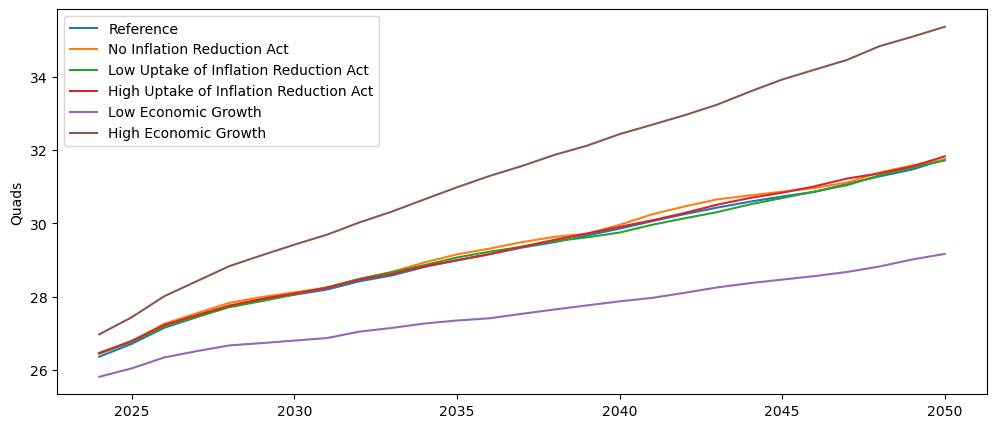

In [6]:
fig, axs = plt.subplots(1,1, figsize=(12, 5))
df.plot(ylabel="Quads", xlabel="", ax=axs)
fig.savefig("aeo-industry.png", dpi=300)

In [6]:
df = pd.DataFrame()
for scenario in scenarios:
    temp = EnergyDemand("commercial", 2050, API, scenario).get_data()
    temp = temp.rename(columns={"value":scenario})
    if df.empty:
        df = temp[scenario].to_frame()
    else:
        df = df.join(temp[scenario].to_frame())
        
df = df.rename(columns={
    "reference":"Reference", 
    "no_ira":"No Inflation Reduction Act",
    "low_ira":"Low Uptake of Inflation Reduction Act",
    "high_ira":"High Uptake of Inflation Reduction Act",
    "low_growth":"Low Economic Growth",
    "high_growth":"High Economic Growth",
})

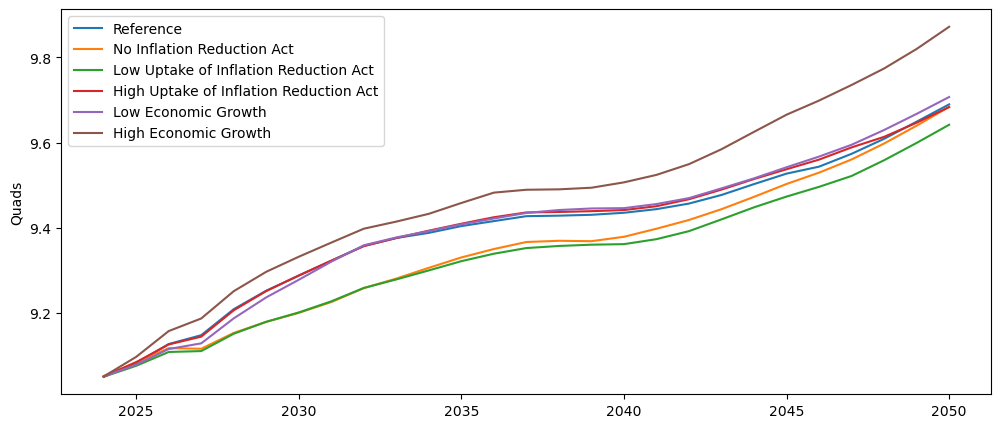

In [7]:
fig, axs = plt.subplots(1,1, figsize=(12, 5))
df.plot(ylabel="Quads", xlabel="", ax=axs)
fig.savefig("aeo-commercial.png", dpi=300)

In [ ]:
vehicle_codes = {
    "light_duty": "kei_trv_trn_NA_ldv_NA_NA_blnvehmls",
    "med_duty": "kei_trv_trn_NA_cml_NA_NA_blnvehmls",
    "heavy_duty": "kei_trv_trn_NA_fght_NA_NA_blnvehmls",
    "bus": "_trv_trn_NA_bst_NA_NA_bpm",
    "rail_passenger": "_trv_trn_NA_rlp_NA_NA_bpm",
    "boat_shipping": "kei_trv_trn_NA_dmt_NA_NA_blntnmls",
    "rail_shipping": "kei_trv_trn_NA_rail_NA_NA_blntnmls",
    "air": "kei_trv_trn_NA_air_NA_NA_blnseatmls",
}

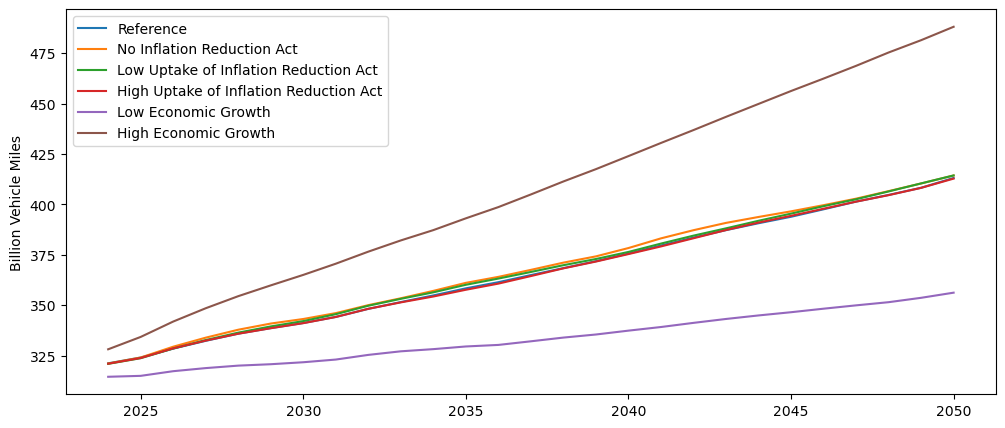

In [12]:
df = pd.DataFrame()
for scenario in scenarios:
    temp = TransportationDemand("heavy_duty", 2050, API, "travel", scenario).get_data()
    temp = temp.rename(columns={"value":scenario})
    if df.empty:
        df = temp[scenario].to_frame()
    else:
        df = df.join(temp[scenario].to_frame())
        
df = df.rename(columns={
    "reference":"Reference", 
    "no_ira":"No Inflation Reduction Act",
    "low_ira":"Low Uptake of Inflation Reduction Act",
    "high_ira":"High Uptake of Inflation Reduction Act",
    "low_growth":"Low Economic Growth",
    "high_growth":"High Economic Growth",
})

fig, axs = plt.subplots(1,1, figsize=(12, 5))
df.plot(ylabel="Billion Vehicle Miles", xlabel="", ax=axs)
fig.savefig("aeo-heavy-duty.png", dpi=300)